(5000, 784)
(5000, 784)


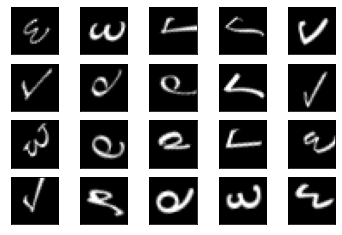

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x_train = np.genfromtxt('xTrain.csv', dtype='f4', delimiter=',').T
y_train = np.genfromtxt('tTrain.csv', dtype='f4', delimiter=',').T
x_test = np.genfromtxt('xTest.csv', dtype='f4', delimiter=',').T
y_test = np.genfromtxt('tTest.csv', dtype='f4', delimiter=',').T

print(x_train.shape)
print(x_test.shape)

for i in range(20):
    X_img = x_train[i].reshape(28,28)
    plt.subplot(4,5,i+1)
    fig = plt.imshow(X_img,cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

plt.show()  

In [2]:
np.random.seed(0)

In [3]:
hiddenSize1 = 120

In [4]:
import keras
from keras import layers

in_size = 784

in_img = keras.Input(shape=(in_size,))
encoded = layers.Dense(hiddenSize1, activation='sigmoid',name='Encoder')(in_img)
decoded = layers.Dense(in_size, activation='sigmoid', name = 'Decoder')(encoded)


autoencoder = keras.Model(in_img, decoded)

encoder = keras.Model(in_img, encoded)

autoencoder.compile(optimizer='adam', loss='MeanSquaredError')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=256,shuffle=True)

Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 0.1364
Epoch 2/100
20/20 [==============================] - 0s 14ms/step - loss: 0.0526
Epoch 3/100
20/20 [==============================] - 0s 14ms/step - loss: 0.0460
Epoch 4/100
20/20 [==============================] - 0s 13ms/step - loss: 0.0450
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0446
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0443
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0441
Epoch 8/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0438
Epoch 9/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0435
Epoch 10/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0431
Epoch 11/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0427
Epoch 12/100
20/20 [==============================] - 0s 13ms/step - loss: 0.0422
Epoch 13/100
20/20 [=====

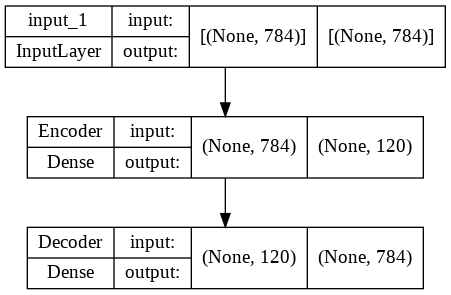

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, to_file='model.png',show_shapes=True, show_layer_names=True)

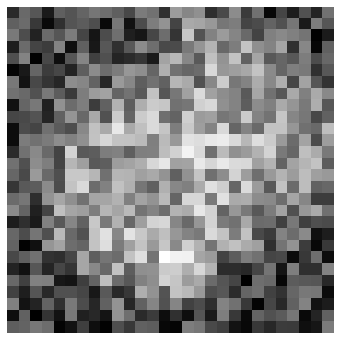

In [6]:
fig = plt.figure(figsize=(6,6))
w = autoencoder.layers[1].get_weights()[0][:,0].reshape(28,28)
plt.imshow(w,cmap='gray')
plt.axis("off")
  
plt.show()

In [7]:
feat1 = encoder.predict(x_train)
hiddenSize2 = 40

In [8]:
in_img2 = keras.Input(shape=(hiddenSize1,))
encoded2 = layers.Dense(hiddenSize2, activation='sigmoid',name="Encoder_2")(in_img2)
decoded2 = layers.Dense(hiddenSize1, activation='sigmoid',name= "Decoder_2")(encoded2)

autoencoder2 = keras.Model(in_img2, decoded2)
encoder2 = keras.Model(in_img2, encoded2)
autoencoder2.compile(optimizer='adam', loss='MeanSquaredError')


autoencoder2.fit(feat1, feat1, epochs=100, batch_size=256,shuffle=True)

Epoch 1/100
20/20 [==============================] - 1s 5ms/step - loss: 0.1474
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1087
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0906
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0838
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0811
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0798
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0789
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0782
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0776
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0769
Epoch 11/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0761
Epoch 12/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0754
Epoch 13/100
20/20 [=================

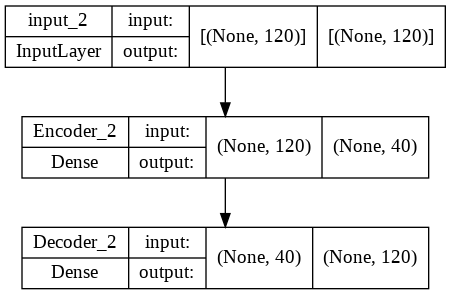

In [9]:
plot_model(autoencoder2, to_file='model.png',show_shapes=True, show_layer_names=True)

In [10]:
feat2 = encoder2.predict(feat1)

In [11]:
from tensorflow.keras.utils import to_categorical

soft_in = keras.Input(shape=(hiddenSize2,))
soft_layer = layers.Dense(10,activation='softmax', name="Softmax")(soft_in)

softnet = keras.Model(soft_in, soft_layer)
softnet.compile(optimizer='adam', loss='MeanSquaredError')

softnet.fit(feat2, y_train, epochs=100, batch_size=256,shuffle=True)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0962
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0925
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0907
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0894
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0889
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0884
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0874
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0869
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0864
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0859
Epoch 13/100
20/20 [=================

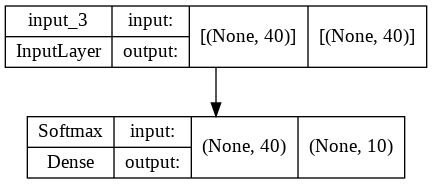

In [12]:
plot_model(softnet, to_file='model.png',show_shapes=True, show_layer_names=True)

In [13]:
enc1 = encoder.predict(x_test)
enc2 = encoder2.predict(enc1)
y_out = softnet.predict(enc2)
y_classified = np.argmax(y_out, axis=1)

In [14]:
stacked_in = keras.Input(shape=(in_size,))
layer1 = layers.Dense(hiddenSize1, activation='sigmoid')(stacked_in)
layer2 = layers.Dense(hiddenSize2, activation='sigmoid')(layer1)
layer3 = layers.Dense(10, activation='softmax')(layer2)


stacked_ae = keras.Model(stacked_in, layer3)
stacked_ae.compile(optimizer="adam", loss = "MeanSquaredError")


stacked_ae.layers[0].set_weights(autoencoder.layers[0].get_weights())
stacked_ae.layers[1].set_weights(autoencoder.layers[1].get_weights())
stacked_ae.layers[2].set_weights(autoencoder2.layers[1].get_weights())
stacked_ae.layers[3].set_weights(softnet.layers[1].get_weights())

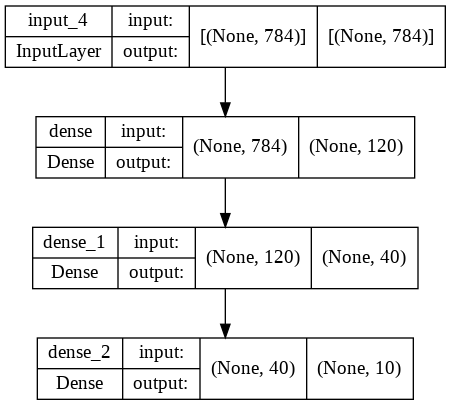

In [15]:
plot_model(stacked_ae, to_file='model.png',show_shapes=True, show_layer_names=True)

In [16]:
import seaborn as sn
def plot_confusion_matrix(y_classified, y_true):
    c_mat = np.zeros((10,10))
    for i in range(len(y_true)):
        c_mat[y_classified[i], y_true[i] ] += 1

    group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

    accuracy = (np.sum(np.logical_and(y_classified, y_true))/ len(y_true)) * 100

    plt.figure(figsize=(12,10))
    sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
    plt.title("Confusion Matrix")
    plt.ylabel('Output Class')
    plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

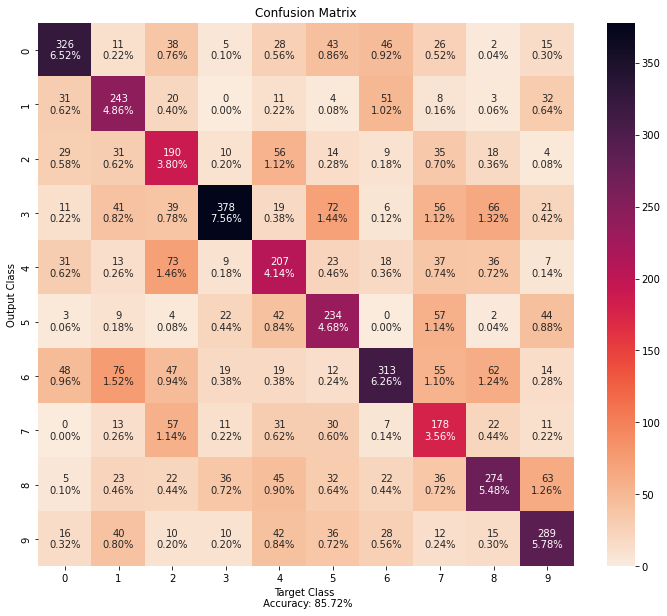

In [17]:

y_stacked = stacked_ae.predict(x_test)

y_classified = np.argmax(y_stacked, axis=1)


y_true = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_classified, y_true)

In [18]:
stacked_ae.fit(x_train, y_train, epochs=100,batch_size = 256, shuffle=True)

Epoch 1/100
20/20 [==============================] - 1s 7ms/step - loss: 0.0616
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0579
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0549
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0522
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0496
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0452
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0432
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0412
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0395
Epoch 11/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0378
Epoch 12/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0362
Epoch 13/100
20/20 [=================

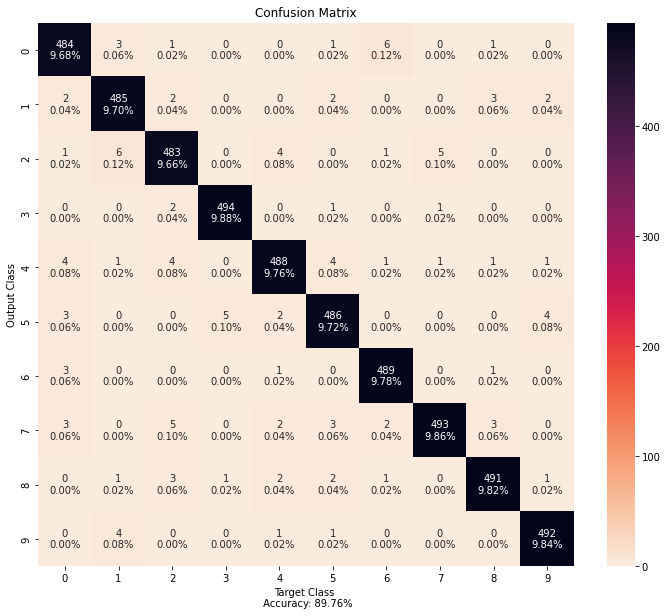

In [19]:
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)


y_true = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_classified, y_true)